**1. This notebook is to explore some HIV trends in South and South-East Asia countries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
file1 = r'data/HIV Incidence per 1000 population - all ages - Rate.xls'

In general, HIV incidence is expressed as the estimated number of persons newly infected with HIV during a specified time period (e.g., a year), or as a rate calculated by dividing the estimated number of persons newly infected with HIV during a specified time period by the number of persons at risk for HIV infection.

Uses of these data: Incidence estimates are useful for planning and for allocating of funds, as well as evaluating the impact of prevention programs.

In [3]:
df1 = pd.read_excel(file1)

In [4]:
df1.head()

,Data Value,Data Value.1,Data Value.2,Data Value.3,Age,All ages,Unnamed: 6,Unnamed: 7
0,Data Value,Data Value,Data Value,Data Value,Range,estimate,lower estimate,upper estimate
1,Area,Time Period,Area ID,Indicator,NaN,NaN,NaN,NaN
2,Afghanistan,2007,AFG,HIV Incidence per 1000 population - all ages -...,NaN,0.02175,0.01016,0.05339
3,NaN,2019,AFG,HIV Incidence per 1000 population - all ages -...,NaN,0.04119,0.01142,0.14963
4,NaN,1994,AFG,HIV Incidence per 1000 population - all ages -...,NaN,0.00824,0.00387,0.01827


In [5]:
df1.columns

Index(['Data Value', 'Data Value.1', 'Data Value.2', 'Data Value.3', 'Age',
       'All ages', 'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

In [6]:
df1.drop(columns=['Data Value.3','Age'], inplace=True)

In [7]:
df1.rename(columns = {'Data Value':"Area", "Data Value.1":"year", "Data Value.2": "Area_ID", "All ages": "Estimate", 
                     "Unnamed: 6":"Lower_estimate", "Unnamed: 7": "Upper_estimate" }, inplace =True)

In [8]:
df1.drop(df1.index[[0,1]], inplace=True)
df1.Area.ffill(axis=0, inplace= True)

In [9]:
df1.head()

,Area,year,Area_ID,Estimate,Lower_estimate,Upper_estimate
2,Afghanistan,2007,AFG,0.02175,0.01016,0.05339
3,Afghanistan,2019,AFG,0.04119,0.01142,0.14963
4,Afghanistan,1994,AFG,0.00824,0.00387,0.01827
5,Afghanistan,2000,AFG,0.01389,0.00704,0.03363
6,Afghanistan,2010,AFG,0.02501,0.01033,0.06425


In [10]:
df1.isnull().sum()

Area              0
year              0
Area_ID           0
Estimate          0
Lower_estimate    0
Upper_estimate    0
dtype: int64

In [11]:
df1[["Estimate", "Lower_estimate", "Upper_estimate"]] = df1[["Estimate", "Lower_estimate", "Upper_estimate"]].apply(pd.to_numeric)

C:\Users\dongw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


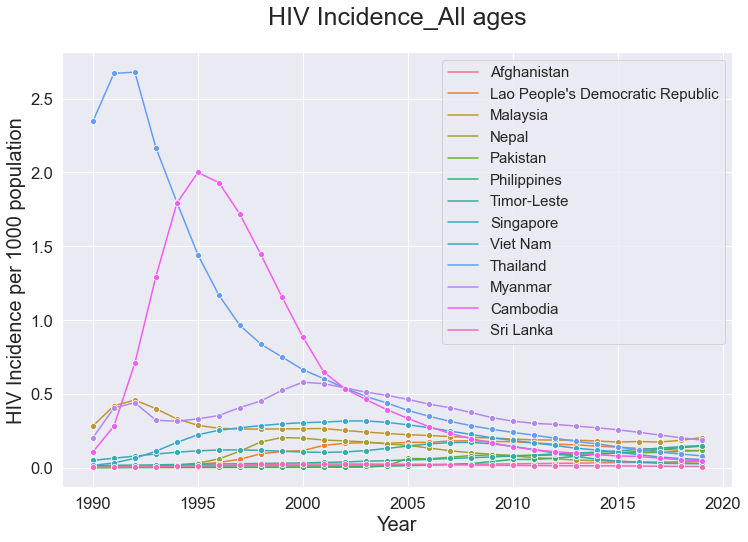

In [12]:
plt.figure(figsize=(12, 8))
sns.set(font_scale = 1.5)
inci = sns.lineplot('year', 'Estimate', ci=None, 
             hue='Area', data=df1, marker = 'o')
inci.set_title('HIV Incidence_All ages', y =1.05, fontsize=25)
#ttl.set_position([2, 1])
inci.set_xlabel('Year', fontsize=20)
inci.set_ylabel('HIV Incidence per 1000 population', fontsize=20)
inci.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=15)
#inci.set_yticklabels(inci.get_yticks(), size = 12)
plt.savefig('HIV Incidence per 1000 population_1990_2019.png', dpi=600) 
plt.show()

In [13]:
#Combodia peaked at 1995, Thailand peaked from 1991-1992, and then dropped very rapidly.

In [14]:
df1 = df1[df1['year']>=2010]

In [15]:
df1.sort_values('Estimate', ascending=False)

,Area,year,Area_ID,Estimate,Lower_estimate,Upper_estimate
322,Myanmar,2010,MMR,0.31472,0.28074,0.35019
323,Myanmar,2011,MMR,0.29976,0.26694,0.33378
324,Myanmar,2012,MMR,0.29244,0.26085,0.32343
325,Myanmar,2013,MMR,0.28136,0.25120,0.31091
326,Myanmar,2014,MMR,0.26961,0.24043,0.29788
...,...,...,...,...,...,...
387,Sri Lanka,2015,LKA,0.01138,0.01008,0.01261
388,Sri Lanka,2016,LKA,0.01012,0.00898,0.01121
389,Sri Lanka,2017,LKA,0.00858,0.00762,0.00950
390,Sri Lanka,2018,LKA,0.00729,0.00650,0.00803


C:\Users\dongw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


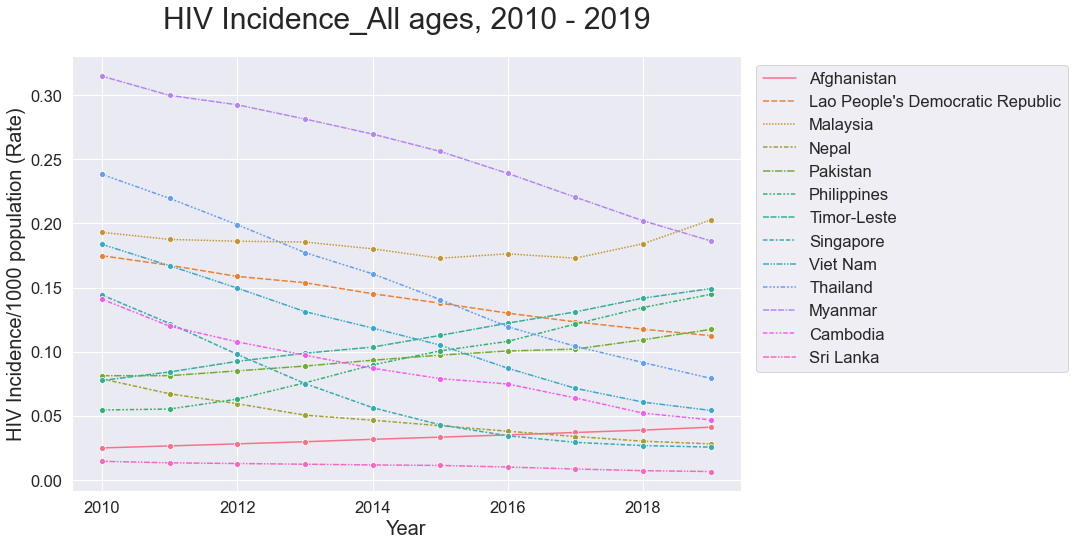

In [16]:
plt.figure(figsize=(12, 8))
sns.set(font_scale = 1.5)
ax = sns.lineplot('year', 'Estimate', ci=None, hue='Area', data=df1, marker = 'o', style ='Area')
ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
ax.set_title('HIV Incidence_All ages, 2010 - 2019', y =1.05, fontsize=30)
ax.set_xlabel("Year",fontsize=20)
ax.set_ylabel("HIV Incidence/1000 population (Rate)",fontsize=20)
plt.savefig('HIV Incidence per 1000 population_2010_2019.png', dpi=600) 
plt.show()


#Myanmar droped last ten years from a high HIV Incidence, Malaysia going up slightly, 
Timor-Leste, Pakistan, Philllippines, ALL going up, Phillippine is steeper, 
Afghanistan going up slightly, although has low incidence comparing to other countries.

Analyze people living with HIV_All ages_Number

In [17]:
file2 = r'data/People living with HIV - all ages - Number.xls'

In [18]:
df2 = pd.read_excel(file2)

In [19]:
df2.head()

,Data Value,Data Value.1,Data Value.2,Data Value.3,Age,All ages,Unnamed: 6,Unnamed: 7
0,Data Value,Data Value,Data Value,Data Value,Range,estimate,lower estimate,upper estimate
1,Area,Time Period,Indicator,Area ID,NaN,NaN,NaN,NaN
2,Afghanistan,2007,People living with HIV - all ages - Number,AFG,NaN,3481,1736,8342
3,NaN,2013,People living with HIV - all ages - Number,AFG,NaN,6271,2758,15987
4,NaN,1994,People living with HIV - all ages - Number,AFG,NaN,649,302,1339


In [20]:
df2.columns

Index(['Data Value', 'Data Value.1', 'Data Value.2', 'Data Value.3', 'Age',
       'All ages', 'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

In [21]:
df2.drop(df2.index[[0,1]], inplace=True)

In [22]:
df2.drop(columns=['Data Value.2','Age'], inplace=True)

In [23]:
df2.rename(columns = {'Data Value':"Area", "Data Value.1":"year", "Data Value.3": "Area_ID", "All ages": "Estimate", 
                     "Unnamed: 6":"Lower_estimate", "Unnamed: 7": "Upper_estimate" }, inplace =True)

In [24]:
df2.Area.ffill(axis=0, inplace= True)

In [25]:
df2.head()

,Area,year,Area_ID,Estimate,Lower_estimate,Upper_estimate
2,Afghanistan,2007,AFG,3481,1736,8342
3,Afghanistan,2013,AFG,6271,2758,15987
4,Afghanistan,1994,AFG,649,302,1339
5,Afghanistan,2000,AFG,1516,826,3561
6,Afghanistan,1990,AFG,280,121,533


In [26]:
df2 = df2[df2['year']>=2010]

In [27]:
df2[["Estimate", "Lower_estimate", "Upper_estimate"]] = df2[["Estimate", "Lower_estimate", "Upper_estimate"]].apply(pd.to_numeric)

C:\Users\dongw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


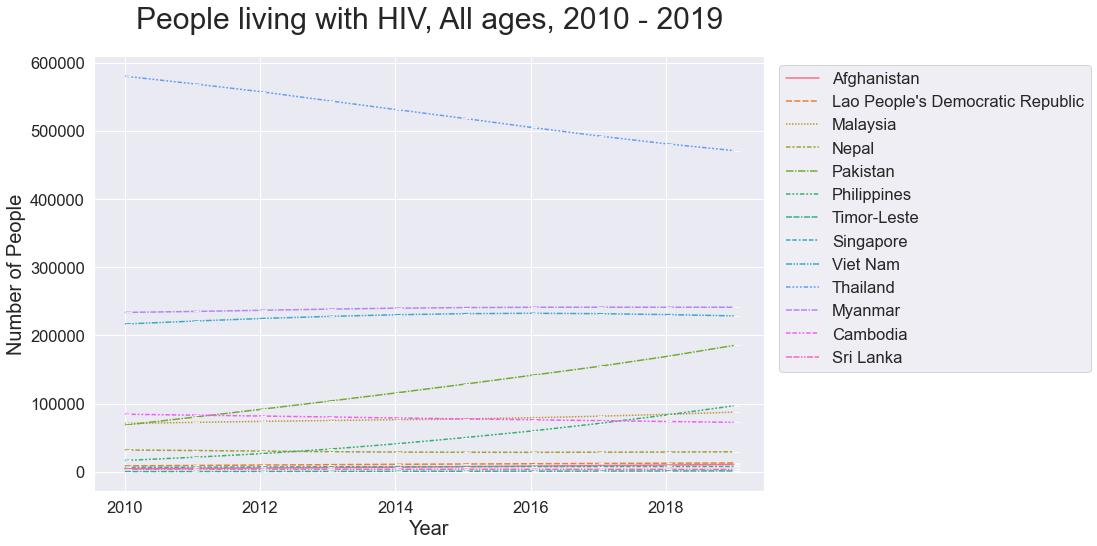

In [28]:
plt.figure(figsize=(12, 8))
ax = sns.lineplot('year', 'Estimate', ci=None, 
             hue='Area', data=df2, marker = True, style ='Area')
ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
ax.set_title('People living with HIV, All ages, 2010 - 2019', y =1.05, fontsize=30)
ax.set_xlabel("Year",fontsize=20)
ax.set_ylabel("Number of People",fontsize=20)
plt.savefig('People living with HIV, All ages, 2010 - 2019.png', dpi=600) 
plt.show()

In [29]:
df3 = df2[df2['year']==2019]
df3.sort_values('Estimate', ascending=False)

,Area,year,Area_ID,Estimate,Lower_estimate,Upper_estimate
301,Thailand,2019,THA,471060,413072,540107
331,Myanmar,2019,MMR,241361,214222,273010
271,Viet Nam,2019,VNM,228753,199864,258131
151,Pakistan,2019,PAK,185299,164693,210518
181,Philippines,2019,PHL,96840,81379,113267
91,Malaysia,2019,MYS,87581,77910,98007
361,Cambodia,2019,KHM,72673,62685,83699
121,Nepal,2019,NPL,29503,25952,33717
61,Lao People's Democratic Republic,2019,LAO,13107,11640,14892
30,Afghanistan,2019,AFG,10956,4340,37949


Although Thailand improved overtime, it still shows 50% higher than Myanmar, which is the second place country. Viet Nam is close to Myanmar, Pakistan have increased HIV incidence, and increased people living with HIV.

In [30]:
file3 = r'data/AIDS mortality per 1000 population - Total - Rate (1).xls'
df4=pd.read_excel(file3)

In [31]:
df4.head()

,Data Value,Data Value.1,Data Value.2,Data Value.3,Range,lower estimate,upper estimate,estimate
0,Data Value,Data Value,Data Value,Data Value,Summary,Total,Total,Total
1,Area,Time Period,Indicator,Area ID,NaN,NaN,NaN,NaN
2,Afghanistan,2006,AIDS mortality per 1000 population - Total - Rate,AFG,NaN,0.003218,0.016476,0.006203
3,NaN,2016,AIDS mortality per 1000 population - Total - Rate,AFG,NaN,0.00429,0.031527,0.010826
4,NaN,1993,AIDS mortality per 1000 population - Total - Rate,AFG,NaN,0.000494,0.002654,0.001296


In [32]:
df4.drop(columns=['Data Value.2','Range'], inplace=True)

In [33]:
df4.rename(columns = {'Data Value':"Area", "Data Value.1":"year", "Data Value.3": "Area_ID"}, inplace =True)

In [34]:
df4.drop(df4.index[[0,1]], inplace=True)

In [35]:
df4.Area.ffill(axis=0, inplace= True)

In [36]:
df4.head()

,Area,year,Area_ID,lower estimate,upper estimate,estimate
2,Afghanistan,2006,AFG,0.003218,0.016476,0.006203
3,Afghanistan,2016,AFG,0.00429,0.031527,0.010826
4,Afghanistan,1993,AFG,0.000494,0.002654,0.001296
5,Afghanistan,2000,AFG,0.001712,0.007339,0.003425
6,Afghanistan,2010,AFG,0.003979,0.020488,0.007993


In [37]:
df4["estimate"] = df4["estimate"].apply(pd.to_numeric,errors='coerce')

In [38]:
df4.isnull().sum()

Area               0
year               0
Area_ID            0
lower estimate     7
upper estimate     7
estimate          10
dtype: int64

In [39]:
df4[df4.isna().any(axis=1)]

,Area,year,Area_ID,lower estimate,upper estimate,estimate
32,Lao People's Democratic Republic,1990,LAO,NaN,NaN,NaN
92,Nepal,1990,NPL,NaN,NaN,4.000000e-07
93,Nepal,1991,NPL,NaN,NaN,8.000000e-07
94,Nepal,1992,NPL,0.1.8e-005,0.2.6e-005,NaN
122,Pakistan,1990,PAK,NaN,NaN,0.000000e+00
123,Pakistan,1991,PAK,NaN,NaN,0.000000e+00
124,Pakistan,1992,PAK,NaN,NaN,1.000000e-07
125,Pakistan,1993,PAK,NaN,NaN,3.000000e-07
127,Pakistan,1995,PAK,0.1.2e-005,0.2.4e-005,NaN
130,Pakistan,1998,PAK,0.3.8e-005,0.6.1e-005,NaN


#estimate has ten missing values

In [40]:
df4.dropna(inplace=True)

C:\Users\dongw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


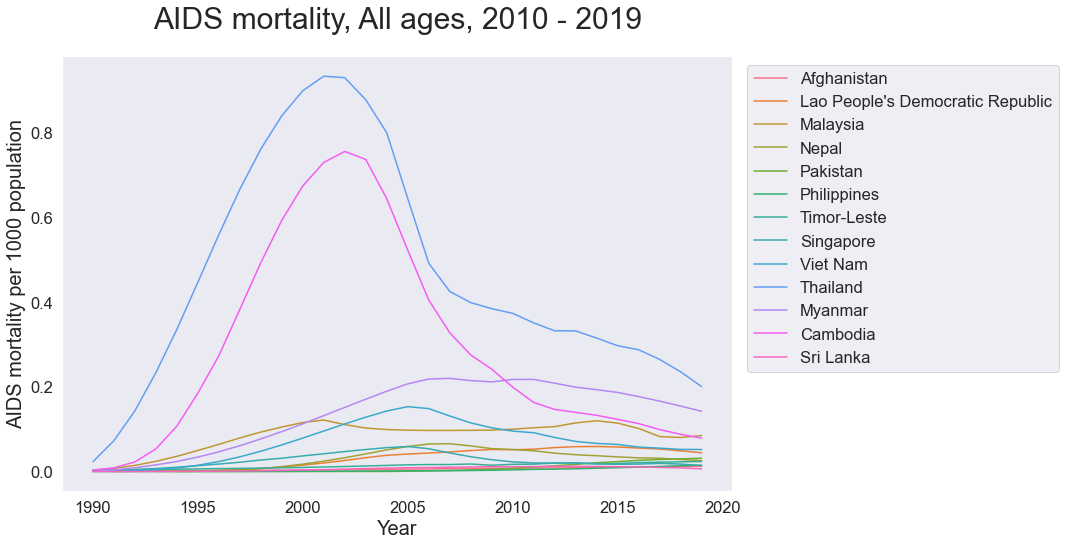

In [41]:
plt.figure(figsize=(12, 8))
sns.set(font_scale = 1.5)
sns.set_style("dark")

ax = sns.lineplot('year', 'estimate', ci=None, 
             hue='Area', data=df4)
ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
ax.set_title('AIDS mortality, All ages, 2010 - 2019', y =1.05,fontsize=30)
ax.set_xlabel("Year",fontsize=20)
ax.set_ylabel("AIDS mortality per 1000 population",fontsize=20)

plt.show()

In [42]:
df5 = df4[df4['year']==2019]
df5.sort_values('estimate', ascending=False)

,Area,year,Area_ID,lower estimate,upper estimate,estimate
301,Thailand,2019,THA,0.151244,0.268459,0.200789
331,Myanmar,2019,MMR,0.108262,0.200818,0.142424
91,Malaysia,2019,MYS,0.067905,0.106608,0.085039
361,Cambodia,2019,KHM,0.058587,0.111356,0.078801
271,Viet Nam,2019,VNM,0.038248,0.074553,0.051978
61,Lao People's Democratic Republic,2019,LAO,0.03362,0.056221,0.044355
151,Pakistan,2019,PAK,0.025702,0.03679,0.031479
121,Nepal,2019,NPL,0.01995,0.035359,0.025820
211,Timor-Leste,2019,TLS,0.013419,0.038679,0.023681
181,Philippines,2019,PHL,0.009507,0.021613,0.014806


Thialand has most people living with  HIV as well as motality, Myanmar shown dropped HIV incidence, but with large population living with HIV, it shown high motality, Malaysia decreased dramaticly of motality.

In [43]:
file4 = r'data/HIV_Prevalence_adults(15-49).xls'
df6=pd.read_excel(file4)

In [45]:
df6.drop(df6.index[[0,1,2,3]], inplace=True)

In [47]:
df6.drop(columns=['Data Value.1','Sex'], inplace=True)

In [48]:
df6.rename(columns = {'Data Value':"Area", "Data Value.2":"year", "Data Value.3": "Area_ID", 'Females':'Females_l', 
                      'Unnamed: 6': 'Females_u', 'Unnamed: 7':'Estimate_F','Males': 'Males_l', 'Unnamed: 9':'Males_u',
                     'Unnamed: 10': 'Estimate_M'}, inplace =True)

In [50]:
df6.head()

,Area,year,Area_ID,Females_l,Females_u,Estimate_F,Males_l,Males_u,Estimate_M
4,Afghanistan,2017,AFG,0.01225,0.08746,0.02835,NaN,NaN,NaN
5,NaN,2015,AFG,0.01106,0.06843,0.02516,NaN,NaN,NaN
6,NaN,2018,AFG,0.01247,0.09644,0.02997,NaN,NaN,NaN
7,NaN,2016,AFG,0.01178,0.07768,0.02668,NaN,NaN,NaN
8,NaN,2019,AFG,0.01269,0.10864,0.03161,NaN,NaN,NaN


In [51]:
df6.isnull().sum()

Area          117
year            0
Area_ID         0
Females_l      65
Females_u      65
Estimate_F     65
Males_l        65
Males_u        65
Estimate_M     65
dtype: int64

In [52]:
df6_fe = df6[['year', 'Area_ID','Females_l','Females_u', 'Estimate_F']]
df6_ma =df6[['year', 'Area_ID','Males_l','Males_u', 'Estimate_M' ]]

In [53]:
df6_fe.head()

,year,Area_ID,Females_l,Females_u,Estimate_F
4,2017,AFG,0.01225,0.08746,0.02835
5,2015,AFG,0.01106,0.06843,0.02516
6,2018,AFG,0.01247,0.09644,0.02997
7,2016,AFG,0.01178,0.07768,0.02668
8,2019,AFG,0.01269,0.10864,0.03161


In [54]:
df6_ma.head()

,year,Area_ID,Males_l,Males_u,Estimate_M
4,2017,AFG,NaN,NaN,NaN
5,2015,AFG,NaN,NaN,NaN
6,2018,AFG,NaN,NaN,NaN
7,2016,AFG,NaN,NaN,NaN
8,2019,AFG,NaN,NaN,NaN


In [55]:
df6_fc=df6_fe.copy()
df6_mc=df6_ma.copy()

In [56]:
df6_fc.dropna(inplace=True)
df6_mc.dropna(inplace=True)

In [57]:
df6_fc['Female']='F'
df6_mc['Male']='M'

In [58]:
df6_fc.head()

,year,Area_ID,Females_l,Females_u,Estimate_F,Female
4,2017,AFG,0.01225,0.08746,0.02835,F
5,2015,AFG,0.01106,0.06843,0.02516,F
6,2018,AFG,0.01247,0.09644,0.02997,F
7,2016,AFG,0.01178,0.07768,0.02668,F
8,2019,AFG,0.01269,0.10864,0.03161,F


In [59]:
df6_fc.drop(columns=['Females_l', 'Females_u'], inplace= True)

In [61]:
df6_mc.drop(columns=['Males_l', 'Males_u'], inplace= True)

In [63]:
df6_mc.rename(columns={'Estimate_M': 'Prevalence', 'Male':'Sex'}, inplace=True)

In [64]:
df6_fc.rename(columns={'Estimate_F': 'Prevalence', 'Female':'Sex'}, inplace=True)

In [65]:
df6_mc.columns

Index(['year', 'Area_ID', 'Prevalence', 'Sex'], dtype='object')

In [66]:
df6_fc.columns

Index(['year', 'Area_ID', 'Prevalence', 'Sex'], dtype='object')

In [67]:
df7=pd.concat([df6_fc, df6_mc])

In [68]:
df7

,year,Area_ID,Prevalence,Sex
4,2017,AFG,0.02835,F
5,2015,AFG,0.02516,F
6,2018,AFG,0.02997,F
7,2016,AFG,0.02668,F
8,2019,AFG,0.03161,F
...,...,...,...,...
124,2015,LKA,0.04113,M
125,2016,LKA,0.04024,M
126,2017,LKA,0.0392,M
127,2018,LKA,0.03805,M


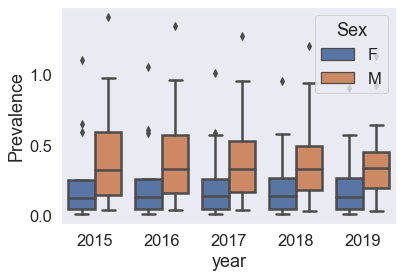

In [69]:
ax = sns.boxplot(x="year", y="Prevalence", hue="Sex",
                 data=df7, linewidth=2.5)

We can see that males have more HIV infection through the years

We will investigate the female males age groups.

In [77]:
file5 = r'data/HIV_prevalence_adults15+_young(1-24).xls'
df8=pd.read_excel(file5)

In [78]:
df8.head()

,Data Value,Data Value.1,Data Value.2,Data Value.3,Sex,Females,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Males,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Data Value,Data Value,Data Value,Data Value,Age,Adults (15+),NaN,NaN,Young people (15-24),NaN,NaN,Adults (15+),NaN,NaN,Young people (15-24),NaN,NaN
1,Data Value,Data Value,Data Value,Data Value,Range,lower estimate,upper estimate,estimate,lower estimate,upper estimate,estimate,lower estimate,upper estimate,estimate,lower estimate,upper estimate,estimate
2,Data Value,Data Value,Data Value,Data Value,Method,NaN,NaN,NaN,modelled,modelled,modelled,NaN,NaN,NaN,modelled,modelled,modelled
3,Area,Indicator,Time Period,Area ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,HIV Prevalence - female adults (aged 15+) - Pe...,2017,AFG,NaN,0.01133,0.07946,0.02603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
df8.rename(columns = {'Data Value':"Area", "Data Value.1":"male adults (aged 15+)", "Data Value.2": "year", "Data Value.3": "Area_ID", "Females": "Fe_Adults (15+)_l",
                     "Unnamed: 6":"Fe_Adults (15+)_u", "Unnamed: 7": "Fe_Adults (15+)_e",
                    "Unnamed: 8": "Fe_young_people_l", "Unnamed: 9": "Fe_young_people_u", "Unnamed: 10": "Fe_young_people_e",
                    "Males": "M__Adults (15+)_l", "Unnamed: 12": "M__Adults (15+)_u", "Unnamed: 13": "M__Adults (15+)_e",
                    "Unnamed: 14": "M_young_people_l","Unnamed: 15": "M_young_people_u", "Unnamed: 16": "M_young_people_e"}, inplace =True)

In [80]:
df8.drop(df8.index[[0,1,2,3]], inplace=True)

In [81]:
df8.drop(columns=['male adults (aged 15+)', 'Sex'], inplace= True)

In [82]:
df8.shape

(260, 15)

In [83]:
df8_Fe_AD=df8.iloc[:, 0:6]

In [84]:
df8_Fe_AD.head()

,Area,year,Area_ID,Fe_Adults (15+)_l,Fe_Adults (15+)_u,Fe_Adults (15+)_e
4,Afghanistan,2017,AFG,0.01133,0.07946,0.02603
5,NaN,2015,AFG,0.01049,0.06407,0.02303
6,NaN,2018,AFG,0.01143,0.08858,0.02756
7,NaN,2016,AFG,0.0109,0.07255,0.02446
8,NaN,2019,AFG,0.01182,0.0995,0.02912


In [85]:
df8_Fe_YO= df8[['Area', 'year', 'Area_ID', 'Fe_young_people_l', 'Fe_young_people_u', 'Fe_young_people_e']]

In [86]:
df8_M_AD= df8[['Area', 'year', 'Area_ID', 'M__Adults (15+)_l', 'M__Adults (15+)_u', 'M__Adults (15+)_e']]

In [87]:
df8_M_YO= df8[['Area', 'year', 'Area_ID', 'M_young_people_l', 'M_young_people_u', 'M_young_people_e']]

In [88]:
df8_Fe_AD=df8_Fe_AD.copy()
df8_Fe_YO=df8_Fe_YO.copy()
df8_M_AD=df8_M_AD.copy()
df8_M_YO=df8_M_YO.copy()

In [89]:
df8_M_YO.head()

,Area,year,Area_ID,M_young_people_l,M_young_people_u,M_young_people_e
4,Afghanistan,2017,AFG,NaN,NaN,NaN
5,NaN,2015,AFG,NaN,NaN,NaN
6,NaN,2018,AFG,NaN,NaN,NaN
7,NaN,2016,AFG,NaN,NaN,NaN
8,NaN,2019,AFG,NaN,NaN,NaN


In [90]:
df8_Fe_AD.isnull().any()

Area                  True
year                 False
Area_ID              False
Fe_Adults (15+)_l     True
Fe_Adults (15+)_u     True
Fe_Adults (15+)_e     True
dtype: bool

In [92]:
df8_Fe_AD.drop(columns = ['Area'], inplace=True)
df8_Fe_YO.drop(columns = ['Area'], inplace=True)
df8_M_AD.drop(columns = ['Area'], inplace=True)
df8_M_YO.drop(columns = ['Area'], inplace=True)

In [93]:
df8_Fe_AD['Type'] = 'Females_Adults(15+)'
df8_Fe_YO['Type'] ='Females_Young(15-24)'
df8_M_AD['Type'] = 'Males_Adults(15+)'
df8_M_YO['Type'] ='Males_Young(15-24)'

In [94]:
df8_Fe_AD.rename(columns = {'Fe_Adults (15+)_l': 'low_estimate', 'Fe_Adults (15+)_u': 'upper_estimate', 'Fe_Adults (15+)_e': 'Prevalence'}, inplace =True)
df8_Fe_YO.rename(columns = {'Fe_young_people_l': 'low_estimate', 'Fe_young_people_u': 'upper_estimate', 'Fe_young_people_e': 'Prevalence'}, inplace =True)
df8_M_AD.rename(columns = {'M__Adults (15+)_l': 'low_estimate', 'M__Adults (15+)_u': 'upper_estimate', 'M__Adults (15+)_e': 'Prevalence'}, inplace =True)
df8_M_YO.rename(columns = {'M_young_people_l': 'low_estimate', 'M_young_people_u': 'upper_estimate', 'M_young_people_e': 'Prevalence'}, inplace =True)

In [95]:
df8_Fe_AD.drop(columns = ['low_estimate', 'upper_estimate'], inplace=True)
df8_Fe_YO.drop(columns = ['low_estimate', 'upper_estimate'], inplace=True)
df8_M_AD.drop(columns = ['low_estimate', 'upper_estimate'], inplace=True)
df8_M_YO.drop(columns = ['low_estimate', 'upper_estimate'], inplace=True)

In [96]:
df6_fc.rename(columns = {'Sex': 'Type'}, inplace =True)
df6_mc.rename(columns = {'Sex': 'Type'}, inplace =True)

In [97]:
df6_mc.columns

Index(['year', 'Area_ID', 'Prevalence', 'Type'], dtype='object')

In [98]:
df6_mc['Type'] ='Male_adults(15-49)'
df6_fc['Type'] ='Female_adults(15-49)'

In [99]:
df8_Fe_AD.isnull().any()

year          False
Area_ID       False
Prevalence     True
Type          False
dtype: bool

In [100]:
df8_Fe_AD.dropna(inplace=True)
df8_Fe_YO.dropna(inplace=True)
df8_M_AD.dropna(inplace=True)
df8_M_YO.dropna(inplace=True)

In [101]:
df8_merge = pd.concat([df8_Fe_AD, df8_Fe_YO, df8_M_AD, df8_M_YO, df6_fc, df6_mc], ignore_index=True)

In [102]:
df8_merge.replace({'Type': {'Females_Adults(15+)': 'Adults(15+)_Females', 'Females_Young(15-24)': 'Young(15-24)_Females', 'Males_Adults(15+)':
                            'Adults(15+)_Males', 'Males_Young(15-24)':'Young(15-24)_Males', 'Female_adults(15-49)': 'Female_adults(15-49)',
                           'Male_adults(15-49)': 'Male_adults(15-49)'}}, inplace = True)

In [103]:
df8_merge_2019=df8_merge[df8_merge['year'] == 2019]

In [104]:
df9 = df8_merge_2019.sort_values('Type')

In [105]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 4 to 259
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        78 non-null     object
 1   Area_ID     78 non-null     object
 2   Prevalence  78 non-null     object
 3   Type        78 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [107]:
df9['Prevalence']=df9['Prevalence'].astype('float64')

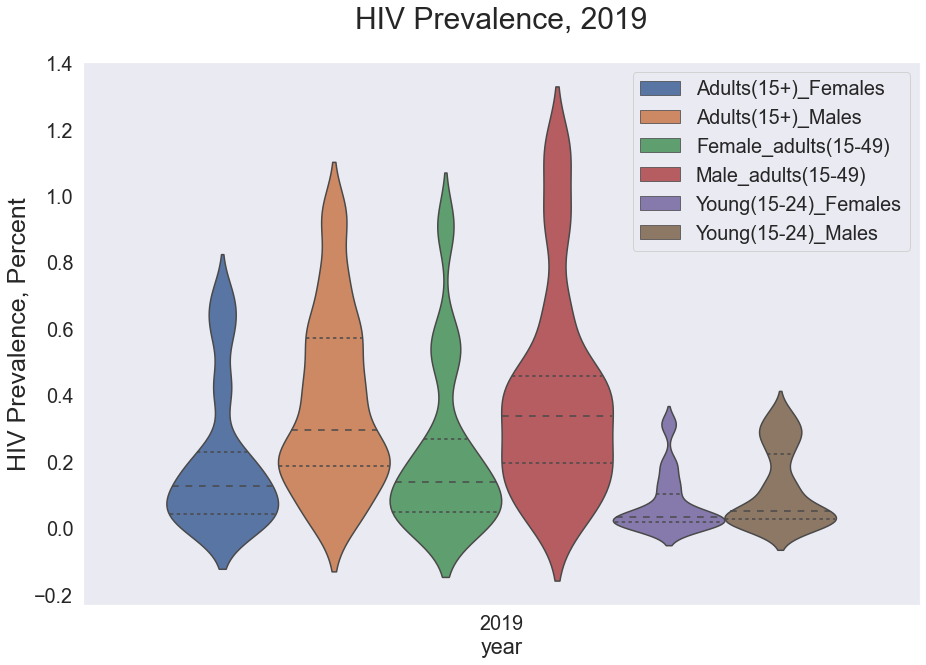

In [108]:
plt.figure(figsize=(15, 10))
sns.set(font_scale = 1.8)
sns.color_palette("pastel")

sns.set_style("dark")
ax = sns.violinplot(x="year", y="Prevalence", hue="Type",              
data=df9, scale="count", inner="quartile", scale_hue=False, bw=.3)

ax.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax.set_title('HIV Prevalence, 2019', y =1.05, fontsize=30)
#ax.set_xlabel("Year",fontsize=20)
ax.set_ylabel("HIV Prevalence, Percent",fontsize=25)
plt.savefig('HIV Prevalence, 2019.png', dpi=600) 
#ax.set_ylim(0, 1.5)


Males at different ages all shown high HIV infection.

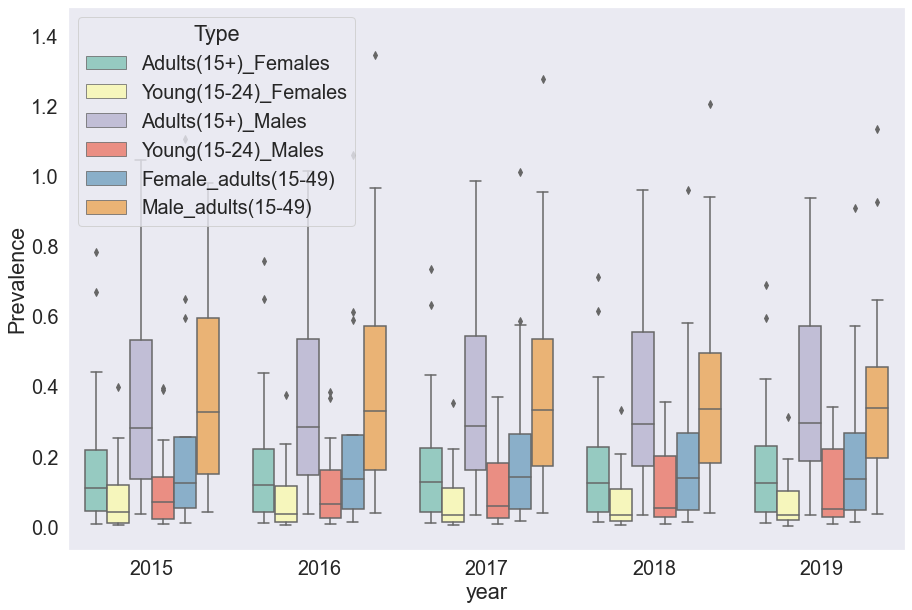

In [111]:
plt.figure(figsize=(15, 10))
sns.color_palette("pastel")
sns.boxplot(x="year", y="Prevalence", hue="Type",              
data=df8_merge, palette="Set3")
a1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

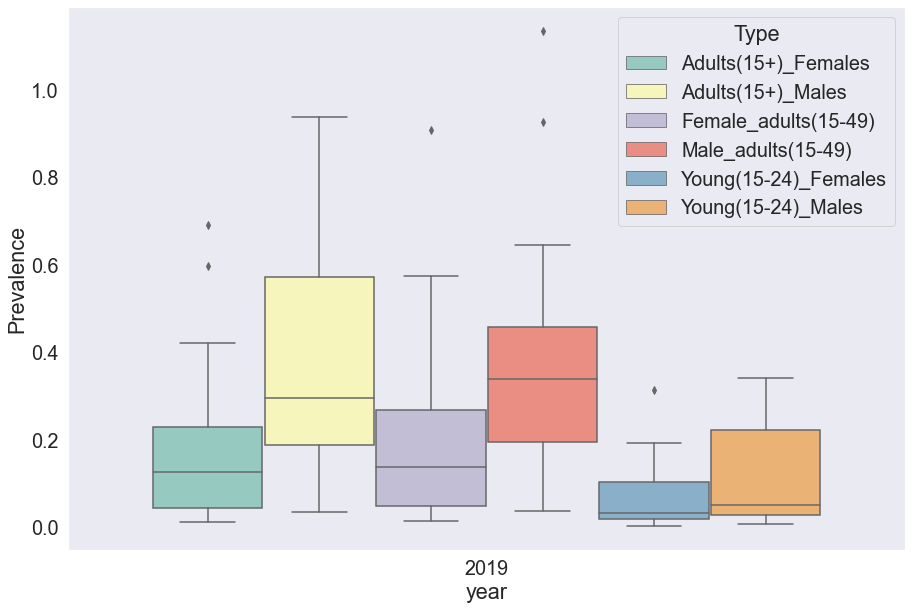

In [113]:
plt.figure(figsize=(15, 10))
sns.color_palette("pastel")
sns.boxplot(x="year", y="Prevalence", hue="Type",              
data=df9, palette="Set3")
a1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.set_title('HIV Prevalence in diffrent set group, 2019', y =1.05, fontsize=30)
#ax.set_xlabel("Year",fontsize=20)
ax.set_ylabel("HIV Prevalence, Percent",fontsize=25)
plt.savefig('HIV Prevalence, 2019.png', dpi=600) 

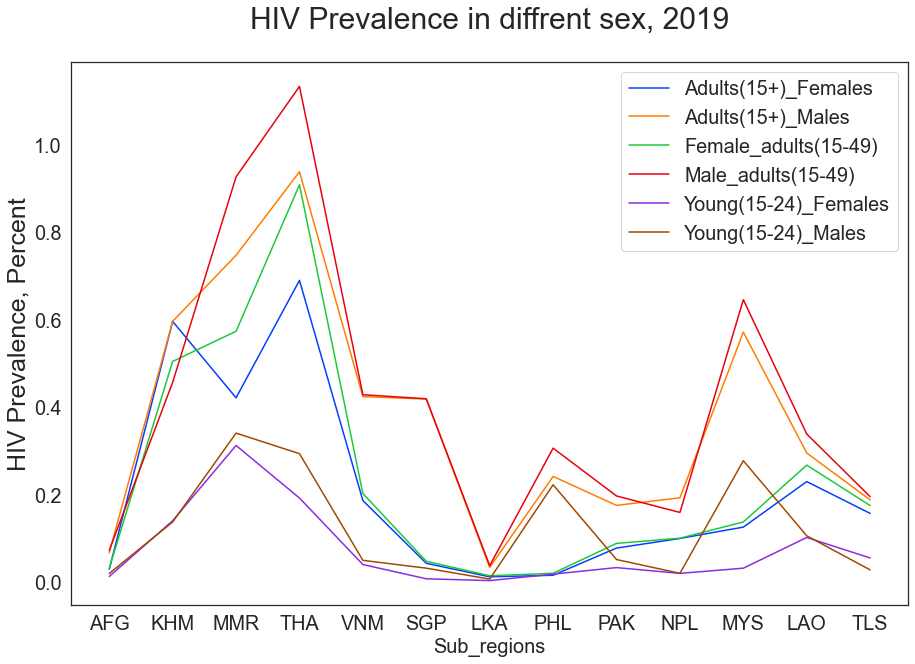

In [115]:
plt.figure(figsize=(15, 10))
sns.set_style("white")

#sns.color_palette("Paired")
ax=sns.lineplot(x="Area_ID", y="Prevalence", hue="Type",              
data=df9, palette="bright")
ax.legend(loc='upper right', bbox_to_anchor=(1, 1))
ax.set_title('HIV Prevalence in diffrent sex, 2019', y =1.05, fontsize=30)
ax.set_xlabel("Sub_regions",fontsize=20)
ax.set_ylabel("HIV Prevalence, Percent",fontsize=25)
plt.savefig('HIV Prevalence in different sex, 2019.png', dpi=600) 
plt.show()

Although it is confirmed that male population is dominant in most of counties. Lao, shows high HIV prevalence in females (what is reason, after identified, they may need special care). SGP has very high prevalence in male_adults. 